### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [2]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir("C:\\Users\\dexte\\sparklyRGT\\data") 

In [3]:
file_names = ['NA01_raw_free-choice_S8-18.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,AnarchyrGT_B-losscue_v6,12/15/19,16:09:50,1,0,1,0,NaN,8,1.0,...,0,0,0,0,0,0,0,0,0,0
1,AnarchyrGT_B-losscue_v6,12/15/19,16:09:50,1,0,1,0,NaN,8,2.0,...,0,0,0,0,0,0,0,0,0,0
2,AnarchyrGT_B-losscue_v6,12/15/19,16:09:50,1,0,1,0,NaN,8,3.0,...,0,0,0,0,0,0,0,0,0,0
3,AnarchyrGT_B-losscue_v6,12/15/19,16:09:50,1,0,1,0,NaN,8,4.0,...,0,0,0,0,0,0,0,0,0,0
4,AnarchyrGT_B-losscue_v6,12/15/19,16:09:50,1,0,1,0,NaN,8,5.0,...,0,0,0,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [4]:
##NA01 ---
cued = [12, 16, 28, 32, 11, 15, 27, 31]

classic = [10, 14, 26, 30, 25, 29, 9, 13] 

random = [1, 3, 5, 7, 17, 19, 21, 23, 2, 4, 6, 8, 18, 20, 22, 24]
##---

##BH09
loss = [25, 17, 21, 51, 55, 1, 5, 35, 39, 29, 9, 13, 43, 47, 10, 14, 26, 18, 22, 44, 48, 52, 56, 2, 6, 36, 40, 30]

outcome = [16, 28, 60, 50, 4, 38, 11, 23, 57, 45, 33, 63]

reverse = [15, 27, 59, 49, 3, 37, 20, 42, 54, 8, 32, 62]

random = [19, 41, 53, 7, 31, 61, 12, 24, 58, 46, 34, 64]
##---

##CH01
cued = list(range(17,33)) #17 to 32

classic = list(range(1,17)) #1 to 16 

reverse = list(range(33,49)) #33-48
##---

##CH02
cued = [1, 5, 17, 21, 3, 7, 19, 23]

classic = [2, 6, 18, 22, 4, 8, 20, 24] 

outcome = [9, 11, 25, 27, 29, 31, 13, 15, 10, 12, 26, 28, 30, 32, 14, 16]
##---


group_names = {0: 'cued',
              1: 'classic',
              2: 'random',
              3: '',
              4: '', 
              5: ''} 

group_list = [cued, classic, random, , , , ]

title = 'Plot' #for plotting

startsess = 8 #first session you would like to include in figures
endsess = 12 #last session you would like to include in figures
len(random)

16

## Data cleaning

### Check session numbers for each rat

In [ ]:
rgt.check_sessions(df)

### Drop/edit session numbers

In [ ]:
# df2 = rgt.drop_sessions(df, [6])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [15], subs = "all")

### Check that you dropped/edited the desired session(s)

In [ ]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [6]:
for i in range(len(df)):
    if df.at[i,'MSN'] == 'AnarchyrGT_B-losscue_v6':
        df.at[i,'MSN'] = 'anarchyrGT_B-losscue_v6'
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum 

,8P1,8P2,8P3,8P4,9P1,9P2,9P3,9P4,10P1,10P2,...,prem9,prem10,prem11,prem12,prem13,prem14,prem15,prem16,prem17,prem18
1,9.7561,12.1951,36.5854,41.4634,0,34.4828,13.7931,51.7241,6.81818,54.5455,...,15.384615,16.363636,20.000000,14.814815,20.588235,12.500000,18.055556,19.718310,13.846154,12.280702
2,54,45,0,1,56.5789,42.1053,0,1.31579,50.5495,47.2527,...,35.772358,17.241379,38.317757,35.714286,13.513514,31.538462,23.622047,24.545455,30.476190,14.130435
3,46.9136,17.284,19.7531,16.0494,52.9412,17.6471,16.4706,12.9412,44.4444,13.8889,...,18.269231,26.000000,15.789474,14.583333,10.400000,12.844037,12.698413,16.417910,15.217391,19.354839
4,57.7982,33.945,7.33945,0.917431,57.5472,32.0755,6.60377,3.77358,39.0909,55.4545,...,24.285714,22.377622,8.000000,5.517241,9.554140,9.448819,3.623188,18.120805,25.490196,15.753425
5,22.7273,0,31.8182,45.4545,52.7778,2.77778,19.4444,25,37.5,4.16667,...,12.765957,23.076923,17.391304,14.035088,12.068966,14.000000,8.333333,19.565217,31.428571,15.625000
6,28.125,31.25,28.125,12.5,20,15,51.6667,13.3333,1.92308,13.4615,...,17.500000,8.333333,5.263158,21.311475,3.278689,18.032787,28.571429,11.764706,29.310345,38.095238
7,23.1707,60.9756,6.09756,9.7561,14.5631,78.6408,3.8835,2.91262,11.7117,85.5856,...,14.876033,12.500000,22.123894,7.894737,14.406780,15.887850,4.255319,16.666667,18.000000,8.571429
8,92.8571,1.42857,1.42857,4.28571,89.1667,5.83333,3.33333,1.66667,59.375,29.1667,...,3.968254,11.009174,15.454545,5.691057,4.587156,9.900990,1.834862,2.112676,2.142857,2.758621
9,14.4578,77.1084,4.81928,3.61446,24.3697,71.4286,0.840336,3.36134,23.2143,75.8929,...,13.571429,20.000000,8.333333,4.347826,1.000000,5.970149,0.934579,7.258065,6.818182,10.000000
10,0,55.5556,27.1605,17.284,0,34.0426,42.5532,23.4043,3.65854,50,...,23.880597,7.777778,16.279070,2.439024,9.195402,7.228916,14.705882,34.065934,5.952381,13.414634


### Get the risk status of the rats


In [7]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1    6.772725          1.0
2   97.559643          1.0
3   35.415016          1.0
4   90.010504          1.0
5  -15.139217          2.0
6  -52.107835          2.0
7   86.323689          1.0
8   85.692217          1.0
9   94.588691          1.0
10   7.061331          1.0
11  46.752211          1.0
12  50.961661          1.0
13  23.357594          1.0
14  71.217126          1.0
15  88.244274          1.0
16  15.183971          1.0
17  72.880730          1.0
18  -8.428378          2.0
19  83.041002          1.0
20  43.569067          1.0
21  81.960133          1.0
22  89.006181          1.0
23 -74.663446          2.0
24  70.725412          1.0
25  88.802683          1.0
26  76.941747          1.0
27 -48.821823          2.0
28  69.494809          1.0
29  72.689616          1.0
30  84.594519          1.0
31  75.065818          1.0
32  47.820303          1.0
[5, 6, 18, 23, 27] [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 28, 29, 

### Export your data to an Excel file 


In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [8]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,8P1,8P2,8P3,8P4,9P1,9P2,9P3,9P4,10P1,10P2,...,prem11,prem12,prem13,prem14,prem15,prem16,prem17,prem18,mean_risk,risk_status
cued,28.2311,40.7575,15.7003,15.3111,24.6608,44.754,14.5713,16.014,22.6934,54.6429,...,20.3726,21.8518,23.1319,21.2346,19.6416,23.1442,20.2883,17.7357,43.0877,1.125
classic,27.5828,47.3718,15.4833,9.56206,30.9999,48.0662,12.0728,8.86113,28.1923,54.8603,...,17.2489,12.9016,15.207,12.4312,11.0448,22.6588,15.4151,17.9008,64.9067,1
random,36.4677,30.3214,18.7019,14.509,38.4036,33.4691,16.6229,11.5043,30.7768,41.3502,...,24.7724,18.6699,14.2707,16.4128,12.7249,18.1693,22.8944,17.3933,43.2886,1.25


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


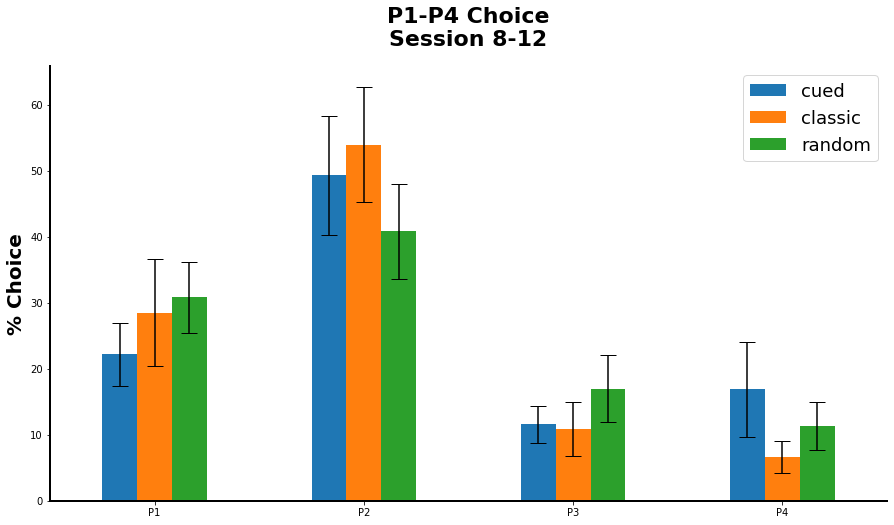

In [9]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


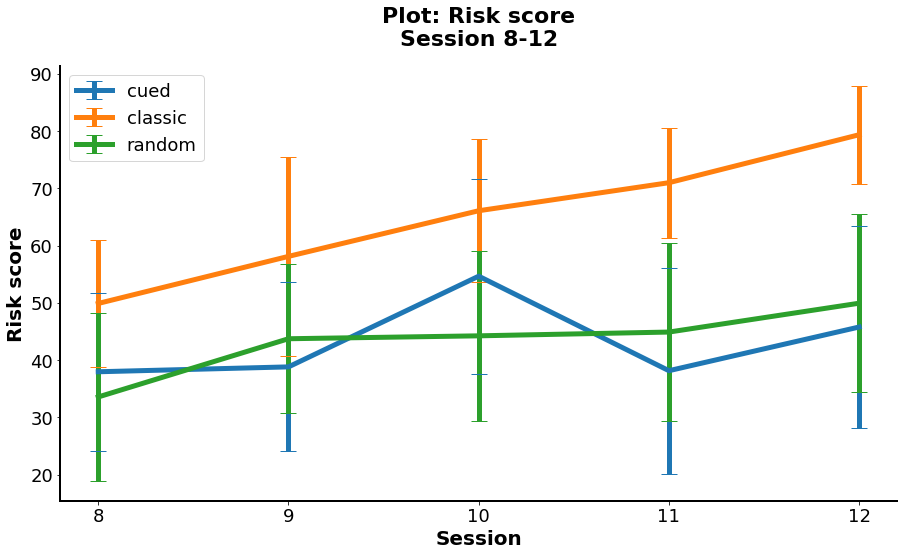

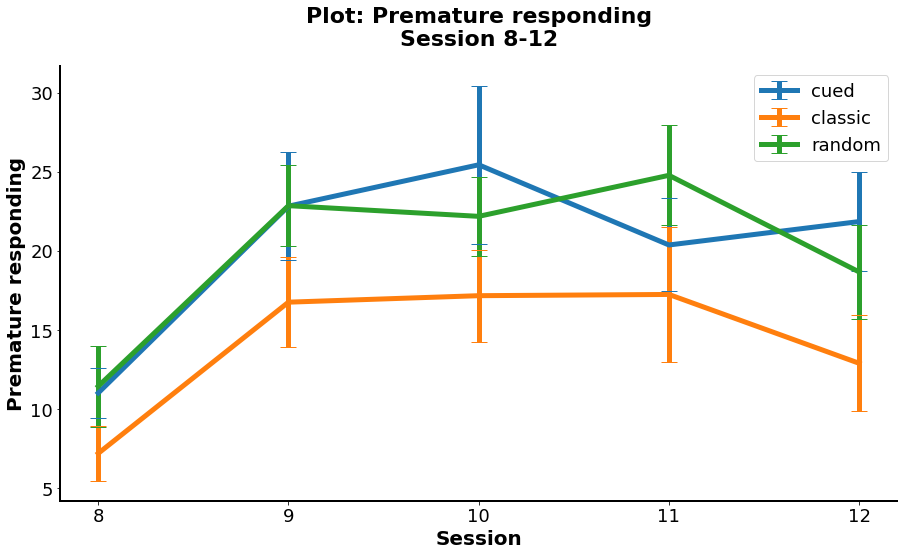

In [10]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



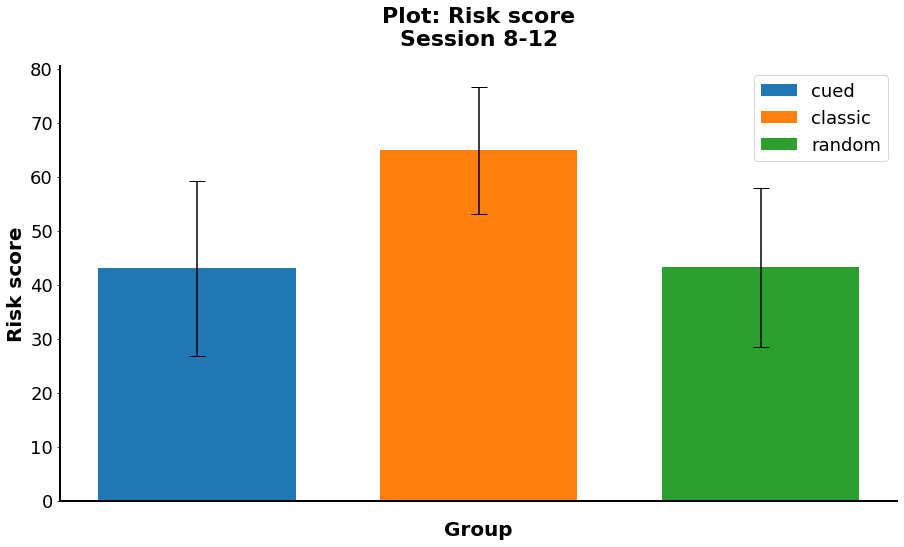

In [11]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')